In [1]:
#!pip install keras_tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from keras import Sequential
from keras_tuner import RandomSearch

In [2]:
# image size in tuple
IMAGE_SIZE = (224, 224)

# path of our dataset
train_path = "/content/drive/MyDrive/Deep Learning/Dataset/Train"
test_path = "/content/drive/MyDrive/Deep Learning/Dataset/Test"

# finding how many class in our dataset using glob
classes = glob("/content/drive/MyDrive/Deep Learning/Dataset/Train/*")
print(f"CLASS COUNT : {len(classes)}")

CLASS COUNT : 4


In [3]:
# creating data generating variable for our dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# getting dataset from the directory
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 4 classes.
Found 48 images belonging to 4 classes.


In [4]:
training_set.class_indices

{'Cat': 0, 'Elephant': 1, 'Lion': 2, 'Pupies': 3}

### **Importing PreTrained Model:**

In [5]:
# Import PreTrained Model
vgg = VGG16(include_top=False, weights="imagenet", input_shape=IMAGE_SIZE+(3,))

# Make the PreTrained model as Non-Trainable
for layers in vgg.layers:
  layers.trainable=False

# Get model summary
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### **Adding Output Layers For VGG16 Model:**

In [6]:
# make that model into sequential so create a sequential model
model = Sequential()

# Add VGG16 model into our sequential model existing O/P layers
model.add(vgg)

# Flatten the model
model.add(Flatten())

# Adding Dense layer for O/P
model.add(Dense(units=len(classes), activation="softmax", kernel_initializer="glorot_uniform"))

# Finally compile the model 
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
# Getting summary of Tuned Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 100356    
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
# Fit dataset into our Model
Model = model.fit(training_set, epochs=10, validation_data=test_set)

Epoch 1/10
3/7 [===========>..................] - ETA: 6s - loss: 2.3507 - accuracy: 0.2778 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


7/7 [==============================] - 27s 2s/step - loss: 2.4326 - accuracy: 0.3050 - val_loss: 2.0670 - val_accuracy: 0.3750
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 1.9199 - accuracy: 0.4800 - val_loss: 0.5026 - val_accuracy: 0.8125
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.8526 - accuracy: 0.6800 - val_loss: 0.4116 - val_accuracy: 0.8750
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.5931 - accuracy: 0.7700 - val_loss: 0.5056 - val_accuracy: 0.7708
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.4216 - accuracy: 0.8400 - val_loss: 0.3487 - val_accuracy: 0.8542
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.3525 - accuracy: 0.8600 - val_loss: 0.3114 - val_accuracy: 0.9167
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.3136 - accuracy: 0.8550 - val_loss: 0.4218 - val_accuracy: 0.7917
Epoch 8/10
7/7 [==============================] - 8

In [9]:
# Getting all keys of our Model History
Model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

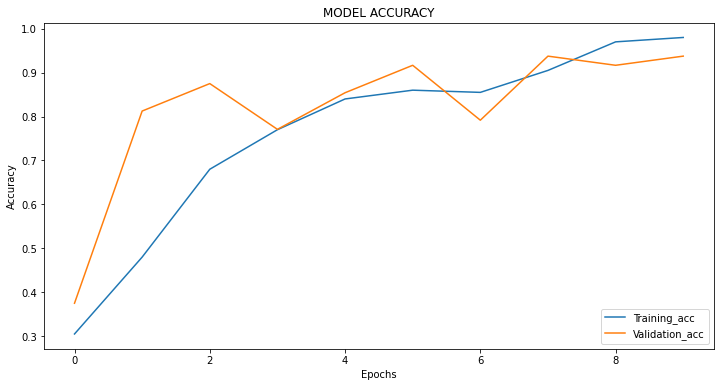

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MODEL ACCURACY")
plt.legend(["Training_acc", "Validation_acc"], loc="lower right")
plt.show()

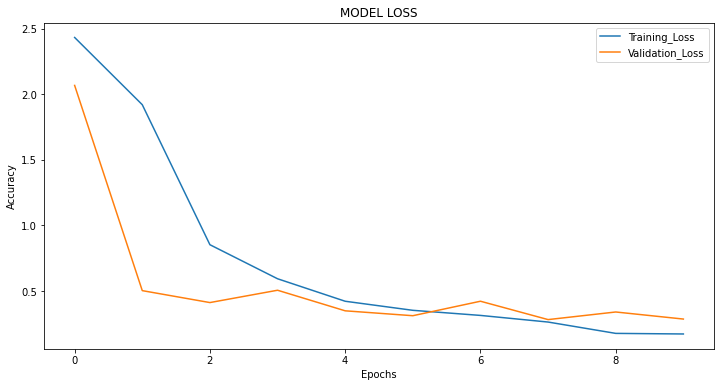

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MODEL LOSS")
plt.legend(["Training_Loss", "Validation_Loss"], loc="upper right")
plt.show()

### **Using Custom data and Predict it:**

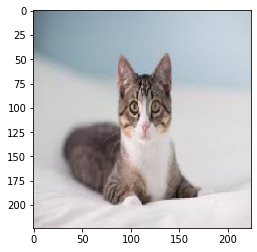

In [12]:
import cv2
from keras.preprocessing import image
path = "/content/drive/MyDrive/Deep Learning/Dataset/Test/Cat/image.jpeg"
img = image.load_img(path, target_size=IMAGE_SIZE+(3,))
plt.imshow(img)

In [13]:
img = image.img_to_array(img)
img = np.array(img)
img = img/255.0

In [14]:
img.shape

(224, 224, 3)

In [15]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [16]:
result = model.predict(img)
result

array([[0.9762137 , 0.00539767, 0.01123272, 0.00715595]], dtype=float32)

In [17]:
np.argmax(result)

0

In [18]:
training_set.class_indices

{'Cat': 0, 'Elephant': 1, 'Lion': 2, 'Pupies': 3}